#📌 Extracão

In [165]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [166]:
dados = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
dados = pd.read_json(dados)
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [167]:
df = pd.DataFrame(dados)

for i in range(2,6):
  coluna = df.columns[2]
  df = df.drop(columns=[coluna]).join(pd.json_normalize(df[coluna]))

df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


#🔧 Transformação

In [169]:
print(df.columns.tolist())


['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']


In [170]:
df_renomeado = df.rename(columns={
    'customerID': 'id_cliente',
    'Churn': 'churn',
    'gender': 'genero',
    'SeniorCitizen': 'idoso',
    'Partner': 'parceiro',
    'Dependents': 'dependentes',
    'tenure': 'meses_contrato',
    'PhoneService': 'servico_telefone',
    'MultipleLines': 'multiplas_linhas',
    'InternetService': 'servico_internet',
    'OnlineSecurity': 'antivirus',
    'OnlineBackup': 'backup',
    'DeviceProtection': 'protecao_dispositivo',
    'TechSupport': 'suporte_tecnico',
    'StreamingTV': 'streaming_tv',
    'StreamingMovies': 'streaming_filmes',
    'Contract': 'tipo_contrato',
    'PaperlessBilling': 'fatura_digital',
    'PaymentMethod': 'metodo_pagamento',
    'Charges.Monthly': 'gasto_mensal',
    'Charges.Total': 'gasto_total'
})

df_renomeado.head()


,id_cliente,churn,genero,idoso,parceiro,dependentes,meses_contrato,servico_telefone,multiplas_linhas,servico_internet,...,backup,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,gasto_mensal,gasto_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [171]:
df_renomeado['churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [172]:
df_renomeado['churn'].value_counts()

,count
churn,
No,5174
Yes,1869
,224


In [173]:
df_renomeado['churn'].value_counts()

,count
churn,
No,5174
Yes,1869
,224


In [174]:
df_renomeado['metodo_pagamento'].value_counts()

,count
metodo_pagamento,
Electronic check,2445
Mailed check,1665
Bank transfer (automatic),1589
Credit card (automatic),1568


In [175]:
df_renomeado['metodo_pagamento'] = df_renomeado['metodo_pagamento'].replace({
    "Electronic check": "Cheque Eletrônico",
    "Mailed check": "Cheque Correio",
    "Credit card (automatic)": "Cartão de Crédito (Automático)",
    "Bank transfer (automatic)": "Transferência Bancária (Automático)"
})

df_renomeado['metodo_pagamento'].value_counts()


,count
metodo_pagamento,
Cheque Eletrônico,2445
Cheque Correio,1665
Transferência Bancária (Automático),1589
Cartão de Crédito (Automático),1568


In [176]:
tabela = (pd.crosstab(df_renomeado['metodo_pagamento'], df_renomeado['churn'], normalize='index') * 100)[['No', 'Yes']]

tabela.columns = ['Taxa de Retenção (%)', 'Taxa de Cancelamento (%)']

print(tabela.round(1))

                                     Taxa de Retenção (%)  \
metodo_pagamento                                            
Cartão de Crédito (Automático)                       82.3   
Cheque Correio                                       78.3   
Cheque Eletrônico                                    52.9   
Transferência Bancária (Automático)                  80.9   

                                     Taxa de Cancelamento (%)  
metodo_pagamento                                               
Cartão de Crédito (Automático)                           14.8  
Cheque Correio                                           18.5  
Cheque Eletrônico                                        43.8  
Transferência Bancária (Automático)                      16.2  


In [177]:
duplicate_rows = df_renomeado[df_renomeado.duplicated(keep=False)]
print("Linhas duplicadas no DataFrame:")
if duplicate_rows.empty:
    print("Sem linhas duplicadas.")
else:
    display(duplicate_rows)

Linhas duplicadas no DataFrame:
Sem linhas duplicadas.


In [178]:
df_renomeado['churn'] = df_renomeado['churn'].astype(str).str.strip()
df_renomeado['churn'] = df_renomeado['churn'].replace('', np.nan)

churn_percentages_valid = (df_renomeado['churn'].value_counts(normalize=True) * 100).round(2)

In [179]:
df_renomeado['churn'] = df_renomeado['churn'].replace('', np.nan)
df_renomeado = df_renomeado.dropna(subset=['churn'])

df_renomeado['gasto_mensal'] = pd.to_numeric(df_renomeado['gasto_mensal'], errors='coerce')
df_renomeado['gasto_total'] = pd.to_numeric(df_renomeado['gasto_total'], errors='coerce')

df_renomeado['gasto_diario'] = df_renomeado['gasto_mensal'] / 30


#📊 Carga e análise

In [180]:
media = df_renomeado['gasto_mensal'].mean()
mediana = df_renomeado['gasto_mensal'].median()
desvio = df_renomeado['gasto_mensal'].std()

print(f"Média do gasto mensal: {media:.2f}")
print(f"Mediana do gasto mensal: {mediana:.2f}")
print(f"Desvio padrão do gasto mensal: {desvio:.2f}")


Média do gasto mensal: 64.76
Mediana do gasto mensal: 70.35
Desvio padrão do gasto mensal: 30.09


In [181]:
churn_counts = df_renomeado['churn'].value_counts(dropna=False)

churn_percentages = (churn_counts / len(df_renomeado)) * 100

churn_percentages = churn_percentages.round(1)

print("Distribuição percentual da Taxa de Cancelamento")
print(churn_percentages)


Distribuição percentual da Taxa de Cancelamento
churn
No     73.5
Yes    26.5
Name: count, dtype: float64


In [182]:
df_renomeado['churn'].describe()


,churn
count,7043
unique,2
top,No
freq,5174


/tmp/ipython-input-3075942268.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_renomeado, x='churn', palette='Set2')


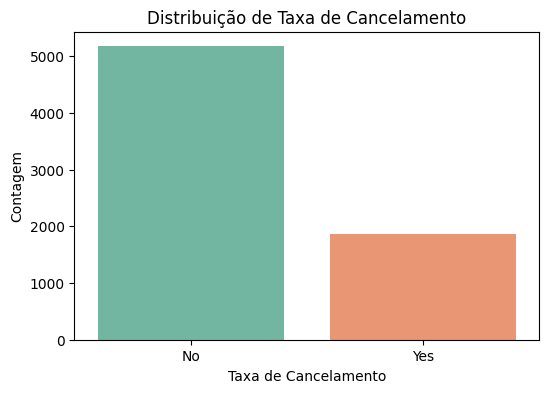

In [183]:

plt.figure(figsize=(6,4))
sns.countplot(data=df_renomeado, x='churn', palette='Set2')
plt.title('Distribuição de Taxa de Cancelamento')
plt.xlabel('Taxa de Cancelamento')
plt.ylabel('Contagem')
plt.show()

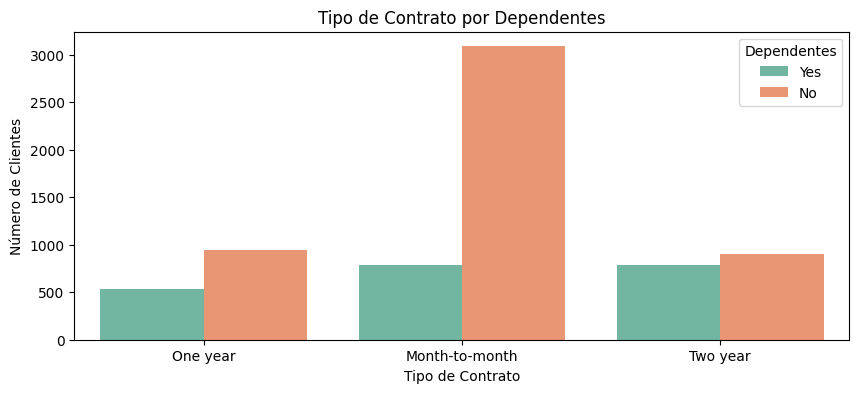

In [184]:
plt.figure(figsize=(10,4))
sns.countplot(data=df_renomeado, x='tipo_contrato', hue='dependentes', palette='Set2')
plt.title('Tipo de Contrato por Dependentes')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.legend(title='Dependentes')
plt.show()

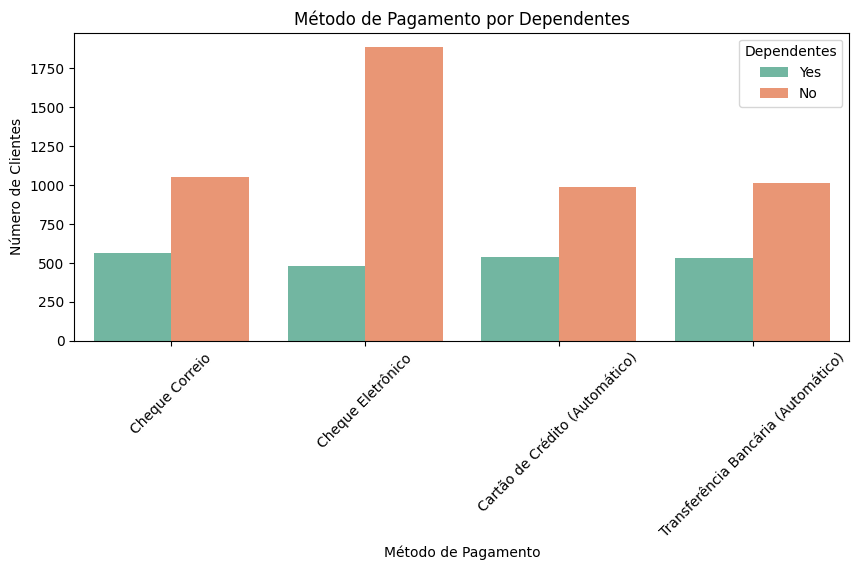

In [185]:
plt.figure(figsize=(10,4))
sns.countplot(data=df_renomeado, x='metodo_pagamento', hue='dependentes', palette='Set2')
plt.title('Método de Pagamento por Dependentes')
plt.xlabel('Método de Pagamento')
plt.ylabel('Número de Clientes')
plt.legend(title='Dependentes')
plt.xticks(rotation=45)
plt.show()

#📄Relatorio Final

O objetivo desta análise é entender o comportamento dos clientes em relação à evasão  da empresa. Ao identificar padrões e características associadas ao churn, podemos propor estratégias para retenção e melhoria da experiência do cliente.

---

### Limpeza e Tratamento de Dados

Inicialmente, importamos os dados e realizamos a limpeza necessária:

- Renomeação de colunas para facilitar a leitura e análise.  
- Tratamento de valores nulos e vazios, especialmente na coluna `churn`.  
- Conversão de colunas numéricas (ex: gasto mensal e total) para o tipo correto.  

---

### Recomendações
Incentivar contratos de prazo maior para reduzir churn.
Promover métodos de pagamento automáticos e simplificados.
Focar em fidelização de clientes com gasto mensal mais baixo.
Monitorar clientes com maior risco para ações proativas